In [80]:
import pandas as pd
from analysis import analysis_data
import os.path as osp
from matplotlib import pyplot as plt
import csv

known_data_path = osp.join(osp.dirname(analysis_data.__file__), "known_performance.csv")
df_known = pd.read_csv(known_data_path)

pred_data_path = osp.join(osp.dirname(analysis_data.__file__), "pred_performance.csv")
df_pred_performance = pd.read_csv(pred_data_path)

pred_data_path = osp.join(osp.dirname(analysis_data.__file__), "pred_consumption_predictions.csv")
df_predictions = pd.read_csv(pred_data_path)

# historic_consumptions_data_path = osp.join(osp.dirname(data.__file__), "historic_consumptions.csv")
# df_historic_consumptions = pd.read_csv(historic_consumptions_data_path)


In [81]:
col_names = ["agent_id",
             "timestep",
            "action",
            "electrical_storage_soc",
            "net_electricity_consumption",
            "non_shiftable_load",
            "solar_generation",
            "carbon_intensity",
            "electricity_pricing"]
df_pred_performance.columns = col_names
# df_pred.head()

In [82]:
prediction_col_names = ["agent_id", "timestep", "predicted_load", "predicted_solar"]
pred_col_names = col_names + prediction_col_names
df_predictions.columns = prediction_col_names
# df_predictions.head()

In [83]:
df_pred = pd.concat([df_pred_performance, df_predictions.drop(["agent_id", "timestep"], axis=1)], axis=1)
df_pred.head()

,agent_id,timestep,action,electrical_storage_soc,net_electricity_consumption,non_shiftable_load,solar_generation,carbon_intensity,electricity_pricing,predicted_load,predicted_solar
0,1,72,-0.031749,0.240058,-0.428789,9.918213e-08,0.0,0.175584,0.22,2.360010,-0.008032
1,2,72,-0.075234,0.240058,-0.428789,9.918213e-08,0.0,0.175584,0.22,2.081728,-0.009476
2,3,72,-0.172681,0.240058,1.503286,1.932075e+00,0.0,0.175584,0.22,2.931047,-0.009840
3,4,72,-0.033845,0.240058,-0.138706,2.900833e-01,0.0,0.175584,0.22,1.246601,-0.004545
4,0,73,0.118720,0.502107,2.661560,8.333500e-01,0.0,0.170252,0.22,-0.764007,-0.004221


In [84]:
# df_known = pd.concat([df_known, df_historic_consumptions], axis=1)

In [85]:
col_names = ["agent_id",
             "timestep",
            "action",
            "electrical_storage_soc",
            "net_electricity_consumption",
            "non_shiftable_load",
            "solar_generation",
            "carbon_intensity",
            "electricity_pricing"]
# historic_col_names = []
# for i in range(10):
#     historic_col_names.append(f"consumption_{i}hours_ago")
#
df_known.columns = col_names # + historic_col_names
# df_known.head()

In [113]:
building_num_known = 0
building_num_pred = 4
df_known_building = df_known.loc[df_known["agent_id"] == building_num_known]
df_pred_building = df_pred.loc[df_pred["agent_id"] == building_num_pred]
df_pred_building_all = df_pred_building.copy()

In [114]:
exclude_columns = ["timestep", "predicted_solar", "agent_id", "carbon_intensity", "electricity_pricing"]
df_known_building = df_known_building[[x for x in col_names if x not in exclude_columns]]
df_pred_building = df_pred_building[[x for x in pred_col_names if x not in exclude_columns]]

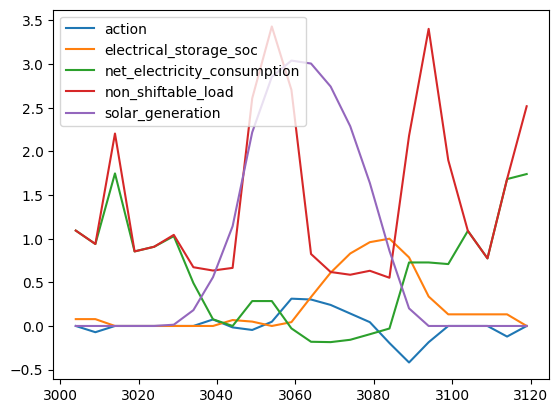

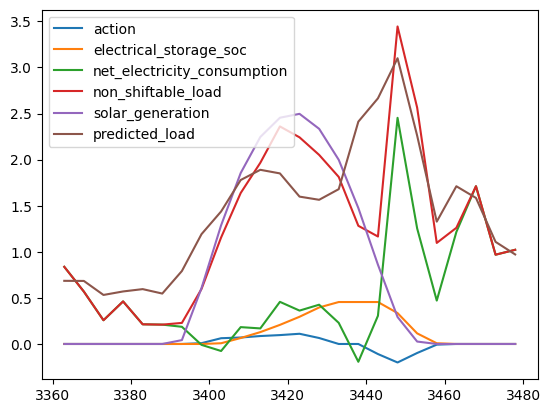

In [115]:
left_bound = 600
window_width = 24
right_bound = left_bound + window_width

df_known_building[left_bound:right_bound].plot(kind='line')
plt.legend(loc='upper left')
plt.show()

shift = 72
df_pred_building[left_bound + shift:right_bound + shift].plot(kind='line')
plt.legend(loc='upper left')
plt.show()

In [116]:
exclude_columns = ["timestep", "predicted_solar", "agent_id"] # "carbon_intensity", "electricity_pricing"
df_pred_building_all = df_pred_building_all[[x for x in pred_col_names if x not in exclude_columns]]
df_pred_building_all = df_pred_building_all.reset_index().drop(["index"], axis=1)
df_pred_building_all["cumulative_cost"] = (df_pred_building_all["carbon_intensity"] * df_pred_building_all["net_electricity_consumption"]) + (df_pred_building_all["electricity_pricing"] * df_pred_building_all["net_electricity_consumption"])

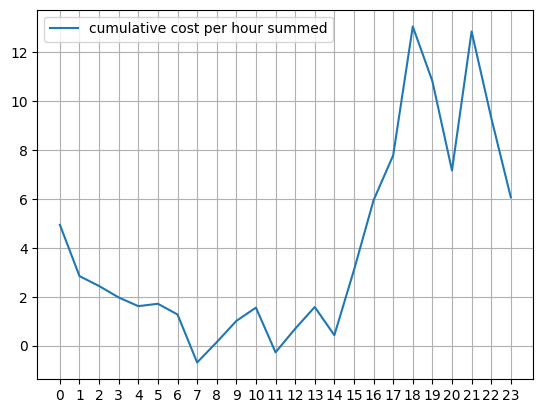

In [117]:
import numpy as np
#
# df_pred_building_all["cumulative_cost"][left_bound:right_bound].plot(kind='line')
# plt.legend(loc='upper left')
# plt.show()
x = df_pred_building_all["cumulative_cost"]

avgs = [0] * 24
for j in range(0, 24):
    for i in range(j, 361, 24):
        avgs[j] += x[i]

pd.Series(avgs).plot(kind='line', label="cumulative cost per hour summed")
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0,24))
plt.show()